In [135]:
# importing packages and libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [109]:
train = pd.read_csv(r'train.csv', sep='\t', encoding='utf-8')
test = pd.read_csv(r'test.csv', sep='\t', encoding='utf-8')

In [110]:
train.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [111]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [112]:
train.dtypes

text     object
label    object
dtype: object

In [113]:
train['label'].unique()

array(['1', '0', 'label'], dtype=object)

In [114]:
train['label'].value_counts()

0        2972
1        2014
label       1
Name: label, dtype: int64

In [115]:
train.drop(train[train['label']=='label'].index, inplace = True)

In [116]:
train['label'].unique()

array(['1', '0'], dtype=object)

In [55]:
train['label'] = pd.to_numeric(train['label'])

In [56]:
train.dtypes

text     object
label     int64
dtype: object

In [117]:
ind = train[train['label']=='0'].index

In [118]:
train.loc[ind,'type']='reliable'

In [119]:
ind = train[train['label']=='1'].index

In [120]:
train.loc[ind,'type']='fake'

In [121]:
train.head()

,text,label,type
0,Get the latest from TODAY Sign up for our news...,1,fake
1,2d Conan On The Funeral Trump Will Be Invited...,1,fake
2,It’s safe to say that Instagram Stories has fa...,0,reliable
3,Much like a certain Amazon goddess with a lass...,0,reliable
4,At a time when the perfect outfit is just one ...,0,reliable


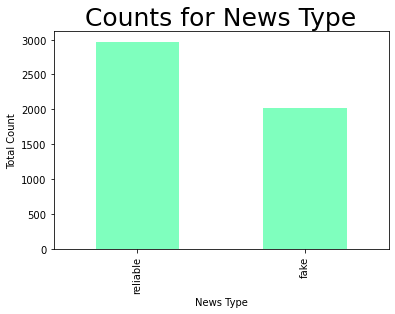

In [122]:
train.type.value_counts().plot(kind='bar', color='springgreen', alpha=0.5)
plt.xlabel('News Type')
plt.ylabel('Total Count')
plt.title("Counts for News Type", fontsize=25)
plt.savefig('newstypecounts.png', bbox_inches='tight', dpi = 300)

In [123]:
y = train['label']

In [124]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(train["text"], y, test_size = 0.33, random_state = 53)

In [125]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '000000', '000th', '001', '001100', '00113234', '002', '007', '008']


In [144]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.735722964763062
[[756 227]
 [208 455]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       983
           1       0.67      0.69      0.68       663

    accuracy                           0.74      1646
   macro avg       0.73      0.73      0.73      1646
weighted avg       0.74      0.74      0.74      1646



In [127]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '000000', '000th', '001', '001100', '00113234', '002', '007', '008']
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0339453 0.        ... 0.        0.        0.       ]]


In [143]:
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7095990279465371
[[957  26]
 [452 211]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       983
           1       0.89      0.32      0.47       663

    accuracy                           0.71      1646
   macro avg       0.78      0.65      0.63      1646
weighted avg       0.76      0.71      0.67      1646



In [130]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))

Alpha:  0.0
Score:  0.7168894289185905
Alpha:  0.1
Score:  0.7679222357229648
Alpha:  0.2
Score:  0.7618469015795869
Alpha:  0.30000000000000004
Score:  0.7624544349939246
Alpha:  0.4
Score:  0.7448359659781288
Alpha:  0.5
Score:  0.7345078979343864
Alpha:  0.6000000000000001
Score:  0.727217496962333
Alpha:  0.7000000000000001
Score:  0.7223572296476306
Alpha:  0.8
Score:  0.7187120291616039
Alpha:  0.9


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.7138517618469016


In [142]:
nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7679222357229648
[[869 114]
 [268 395]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       983
           1       0.78      0.60      0.67       663

    accuracy                           0.77      1646
   macro avg       0.77      0.74      0.75      1646
weighted avg       0.77      0.77      0.76      1646

